In [39]:
import sys
import os
import numpy as np
sys.path.append("../..")

from progressbar import progressbar as pbar
from omegaconf import OmegaConf
from sdofm.datasets.SDOML import SDOMLDataModule, SDOMLDataset
from sdofm.datasets import RandomIntervalSDOML 
from importlib import reload
from sdofm.models import unet_virtualeve
import matplotlib.pyplot as plt
from rlxutils import subplots

In [7]:
cfg = OmegaConf.load("../../experiments/default.yaml")
cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.eve, cfg.data.sdoml.base_directory, cfg.data.sdoml.sub_directory.cache,



('/mnt/sdoml', 'EVE_legacy.zarr', '/mnt/sdoml', 'cache')

In [18]:
reload(RandomIntervalSDOML)
year = '2011'
year_end = year
year_start = year
data_module = RandomIntervalSDOML.RandomIntervalSDOMLDataModule(
    hmi_path=os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.hmi,
    ),
    aia_path = os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.aia,
    ),    
    eve_path = os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.eve,
    ),    
    components  = cfg.data.sdoml.components,
    wavelengths = cfg.data.sdoml.wavelengths,
    ions        = cfg.data.sdoml.ions,
    frequency   = cfg.data.sdoml.frequency,
    batch_size  = 8,
    num_workers = 10,
    num_frames  = 1,
    blosc_cache = "/home/rlx/blosc_cache",
    start_date = f'{year_start}-01-01',
    end_date   = f'{year_end}-12-31',
    dim = False,
    sampling_period = '10days',
    val_months  = cfg.data.month_splits.val,
    test_months = cfg.data.month_splits.test,
    holdout_months = cfg.data.month_splits.holdout,
    cache_dir = os.path.join(
        cfg.data.sdoml.base_directory,
        cfg.data.sdoml.sub_directory.cache,
    ),
)
data_module.setup()

[* CACHE SYSTEM *] Found cached index data in /mnt/sdoml/cache/aligndata_HMI_FULL_AIA_FULL_EVE_FULL_12min.csv.
[* CACHE SYSTEM *] Found cached normalization data in /mnt/sdoml/cache/normalizations_HMI_FULL_AIA_FULL_EVE_FULL_12min.json.
[* CACHE SYSTEM *] Found cached HMI mask data in /mnt/sdoml/cache/hmi_mask_512x512.npy.


In [20]:
b = next(iter(data_module.train_dataloader()))

In [31]:
dl = data_module.train_dataloader()
eve_data = []
for b in pbar(dl):
    for e in b['eve_data'].numpy():
        eve_data.append(e)

100% (1098 of 1098) |####################| Elapsed Time: 0:02:14 Time:  0:02:140111


In [35]:
ed = np.r_[eve_data][:,:,0]
ed.shape

(8784, 38)

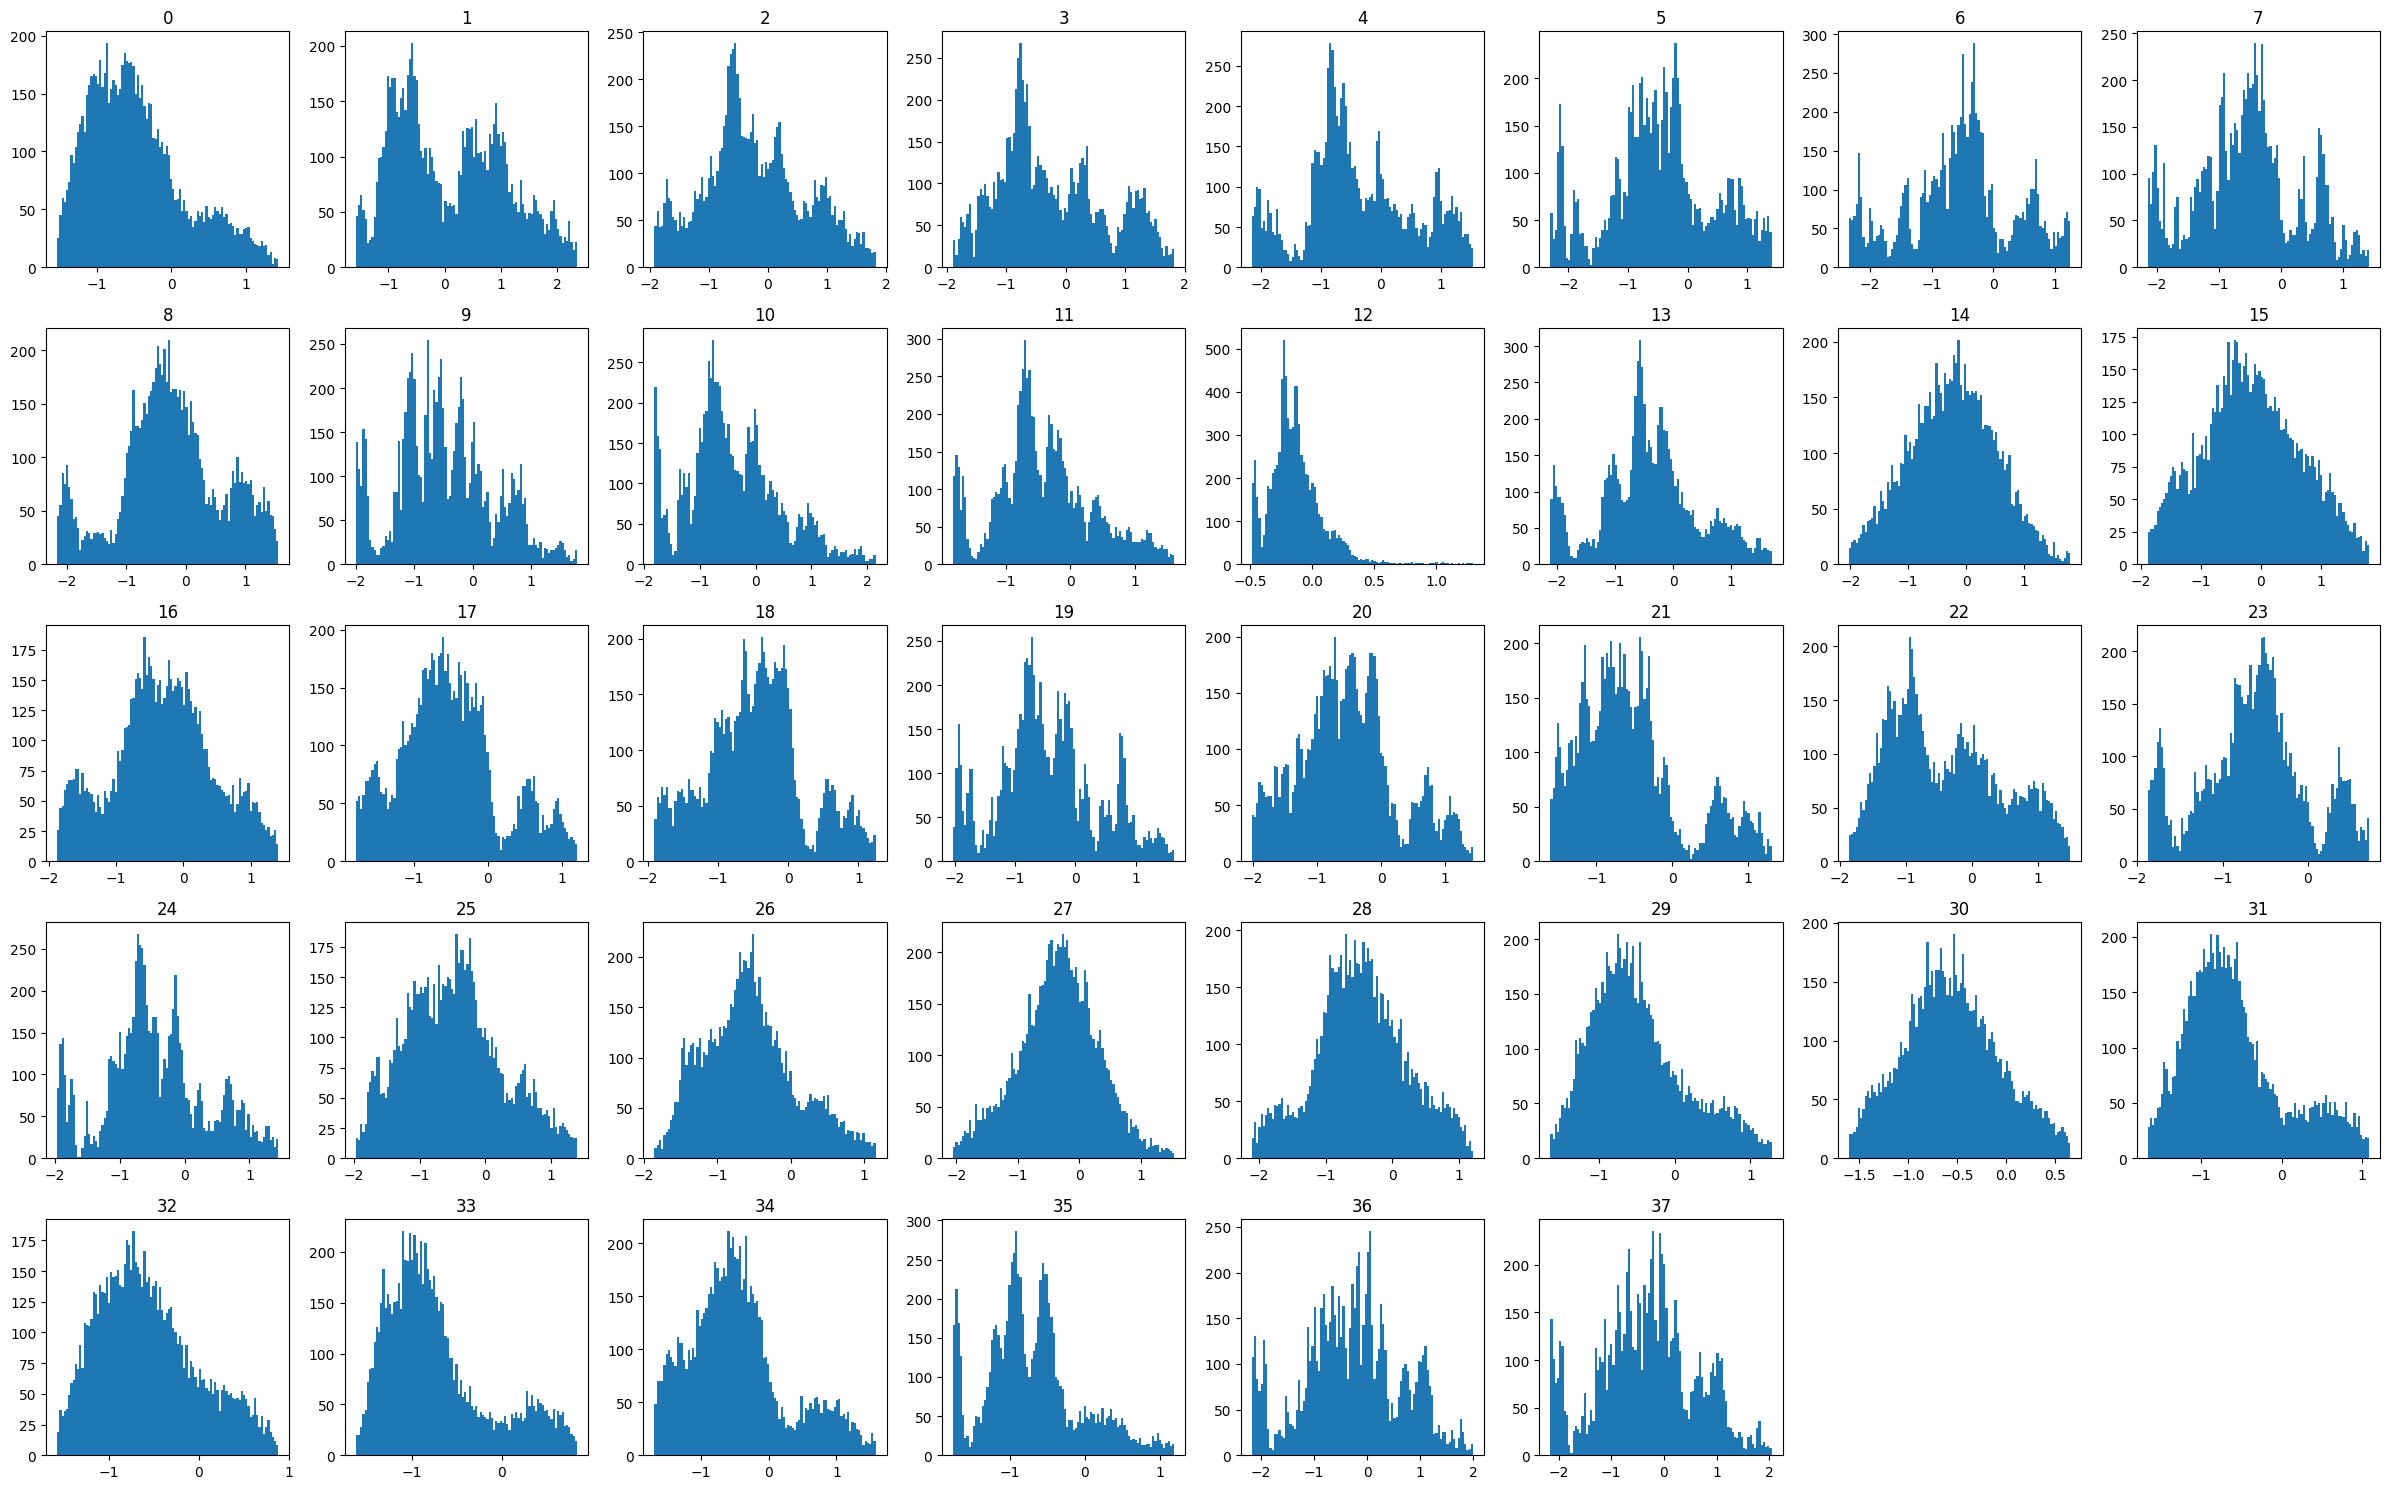

In [42]:
for ax,i in subplots(ed.shape[1], n_cols=8):
    x = ed[:,i]
    a,b = np.percentile(x, (1,99))
    x = x [ (x>a) & (x<b) ]
    plt.hist(x, bins=100);
    plt.title(i)